In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
#
import plotly.graph_objs as go
import plotly.offline as offline
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**I studied the values of Aselsan company between the years 2015-2021 from the Borsa İstanbul BIST 30 dataset. I made transactions with the closing values of the stock throughout the project. Towards the end of the project, I also did a study with the opening, highest, and closing values. As models, I used RNN with adam, RNN with rmsprop, LSTM and GRU. I played with the activation functions, optimization functions, and layer numbers in each model as desired. As an extra, I added learningRateSchedular to my first two models. Towards the end of the project, I tried to show the accuracy of the results and how well the model works with my model, which I prepared together with the share values of BIOEN, another company that is different from the shares of Aselsan.**

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [2]:
import plotly.graph_objs as go
import plotly.offline as offline

In [3]:
df = pd.read_csv("../input/borsa-istanbul-turkish-stock-exchange-dataset/stocks/ASELS.csv")

In [4]:
df

,TRADE DATE,INSTRUMENT SERIES CODE,INSTRUMENT NAME,MARKET SEGMENT,MARKET,INSTRUMENT TYPE,INSTRUMENT CLASS,MARKET MAKER,BIST 100 INDEX,BIST 30 INDEX,...,SHORT SALE VWAP,TRADED VALUE OF SHORT SALE TRADES,TRADED VOLUME OF SHORT SALE TRADES,NUMBER OF CONTRACTS OF SHORT SALE TRADES,LOWEST TRADE REPORT PRICE,HIGHEST TRADE REPORT PRICE,TRADE REPORT VWAP,TRADE REPORT TRADED VALUE,TRADE REPORT TRADED VOLUME,NUMBER OF TRADE REPORTS
0,2015-11-30,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.541,1123013.36,67893,198,0.0,0.0,0.0,0.0,0,0
1,2015-12-01,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.825,887236.89,52734,82,0.0,0.0,0.0,0.0,0,0
2,2015-12-02,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.905,252597.73,14942,75,0.0,0.0,0.0,0.0,0,0
3,2015-12-03,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.620,1183598.07,71216,178,0.0,0.0,0.0,0.0,0,0
4,2015-12-04,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.239,872771.40,53747,206,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2021-12-27,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,1,...,22.150,66058617.12,2982265,2771,0.0,0.0,0.0,0.0,0,0
1527,2021-12-28,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,1,...,21.420,31302245.84,1461326,1290,0.0,0.0,0.0,0.0,0,0
1528,2021-12-29,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,1,...,21.276,15303091.90,719261,1188,0.0,0.0,0.0,0.0,0,0
1529,2021-12-30,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,1,...,21.514,20101419.46,934330,899,0.0,0.0,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   TRADE DATE                                      1531 non-null   object 
 1   INSTRUMENT SERIES CODE                          1531 non-null   object 
 2   INSTRUMENT NAME                                 1531 non-null   object 
 3   MARKET SEGMENT                                  1531 non-null   object 
 4   MARKET                                          1531 non-null   object 
 5   INSTRUMENT TYPE                                 1531 non-null   object 
 6   INSTRUMENT CLASS                                1531 non-null   object 
 7   MARKET MAKER                                    1531 non-null   int64  
 8   BIST 100 INDEX                                  1531 non-null   int64  
 9   BIST 30 INDEX                            

In [6]:
df.shape

(1531, 47)

In [7]:
df = df[['TRADE DATE','INSTRUMENT NAME','OPENING PRICE','LOWEST PRICE','HIGHEST PRICE','CLOSING SESSION PRICE','TOTAL TRADED VOLUME']]
df2 = df[['OPENING PRICE','HIGHEST PRICE','CLOSING SESSION PRICE']]

In [8]:
df.head()

,TRADE DATE,INSTRUMENT NAME,OPENING PRICE,LOWEST PRICE,HIGHEST PRICE,CLOSING SESSION PRICE,TOTAL TRADED VOLUME
0,2015-11-30,ASELSAN,16.10,16.06,17.02,16.61,2034094.0
1,2015-12-01,ASELSAN,16.66,16.63,16.98,16.79,1011765.0
2,2015-12-02,ASELSAN,16.85,16.60,17.14,16.60,934411.0
3,2015-12-03,ASELSAN,16.65,16.16,16.90,16.20,640974.0
4,2015-12-04,ASELSAN,16.30,16.01,16.38,16.34,414105.0


In [9]:
trace_high = go.Scatter(x=df['TRADE DATE'],
                        y=df['HIGHEST PRICE'],
                        
                        name = "ASELSAN High",
                        
                        line = dict(color = '#6699FF')
                       )
trace_low = go.Scatter( x=df['TRADE DATE'],
                        y=df['LOWEST PRICE'],
                        
                        name = "ASELSAN Low",
                        
                        line = dict(color = '#FF6633')
                       )
trace_open = go.Scatter( x=df['TRADE DATE'],
                        y=df['OPENING PRICE'],
                        
                        name =  "ASELSAN Open",
                        
                        line = dict(color = 'red')
                       )
trace_close = go.Scatter( x=df['TRADE DATE'],
                        y=df['CLOSING SESSION PRICE'],
                        
                        name = "ASELSAN Close",
                        
                        line = dict(color = 'purple')
                       )
data_figure = [trace_open,trace_high, trace_low,trace_close]
layout = dict(
    
    title = "ASELSAN Stock Price Data ",
    
    xaxis = dict(rangeselector = dict(buttons = list([dict(count = 1,
                                                           label = '1m',
                                                           step = 'month',
                                                           stepmode = 'todate',
                                                          visible = True),
                                                      
                                                  dict(count = 3,
                                                           label = '3m',
                                                           step = 'month',
                                                           stepmode = 'backward',
                                                          visible = True),
                                                      
                                                      dict(count = 6,
                                                           label = '6m',
                                                           step = 'month',
                                                           stepmode = 'backward',
                                                          visible = True),
                                                  
                                                      dict(step = 'all')])
                                     ),
                 
                 rangeslider=dict(visible = True),
                 type='date'
    )
)
fig = dict(data=data_figure, 
           layout=layout)

offline.iplot(fig)

In [10]:
data_temp = df.iloc[965:975,:]
trace = go.Candlestick(x = df['TRADE DATE'],                       
                       open = df['OPENING PRICE'],                       
                       high = df['HIGHEST PRICE'],                       
                       low = df['LOWEST PRICE'],                       
                       close = df['CLOSING SESSION PRICE'],  
                      increasing = dict(fillcolor = 'greenyellow', 
                                         line = dict(color = 'green', 
                                                     width = 3
                                                    )),
                       decreasing = dict(fillcolor = 'lightcoral'),                       
                       whiskerwidth = 0.2)
data_figure_2 = [trace]
layout = dict(title = 'Aselsan Stock Price Data ')
fig = dict(data=data_figure_2, 
           layout=layout)
offline.iplot(fig)

In [11]:
# Split Data
dataset_train = df.loc[0:1131,:]
dataset_test  = df.loc[1131:,:]

In [12]:
print(dataset_train.shape)
print(dataset_test.shape)

(1132, 7)
(400, 7)


In [13]:
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(dataset_train.loc[:,["CLOSING SESSION PRICE"]].values)
train_scaled

array([[0.36699072],
       [0.37096774],
       [0.36676977],
       ...,
       [0.63764914],
       [0.64516129],
       [0.65399912]])

In [14]:
train_scaled.shape

(1132, 1)

In [15]:
X_train = []
y_train = []
sequence_length = 50

for i in range(sequence_length, 1132):
    X_train.append(train_scaled[i-sequence_length:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:

from IPython.display import Image
  
# get the image
Image(url="https://i0.wp.com/www.relataly.com/wp-content/uploads/2020/06/image-4.png?resize=768%2C380&ssl=1", width=800, height=750)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X size:",X_train.size)

print("Y size:",y_train.size)

X size: 54100
Y size: 1082


In [18]:
print("X shape:",X_train.shape)

print("Y shape:",y_train.shape)

X shape: (1082, 50, 1)
Y shape: (1082,)


In [19]:
print(X_train) 
#1082 tane batch var, her batch'te 50 tane değer var, bu değerler ise one-encoding gibi değildir, sadece 1 feature var.

[[[0.36699072]
  [0.37096774]
  [0.36676977]
  ...
  [0.39549271]
  [0.39549271]
  [0.38709677]]

 [[0.37096774]
  [0.36676977]
  [0.35793195]
  ...
  [0.39549271]
  [0.38709677]
  [0.38356164]]

 [[0.36676977]
  [0.35793195]
  [0.36102519]
  ...
  [0.38709677]
  [0.38356164]
  [0.38665488]]

 ...

 [[0.65930181]
  [0.61334512]
  [0.57224923]
  ...
  [0.60583297]
  [0.63323023]
  [0.64560318]]

 [[0.61334512]
  [0.57224923]
  [0.57799381]
  ...
  [0.63323023]
  [0.64560318]
  [0.63764914]]

 [[0.57224923]
  [0.57799381]
  [0.5382236 ]
  ...
  [0.64560318]
  [0.63764914]
  [0.64516129]]]


In [20]:
import tensorflow as tf


In [21]:
sequence_length = 50
actual_prices = dataset_test["CLOSING SESSION PRICE"].values

total_dataset = pd.concat((dataset_train["CLOSING SESSION PRICE"], dataset_test["CLOSING SESSION PRICE"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(dataset_test) - sequence_length:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test = []
y_test = []
for x in range(sequence_length, len(model_inputs)):
    x_test.append(model_inputs[x-sequence_length:x, 0])
    y_test.append(model_inputs[x, 0])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

print(x_test.shape)
print(y_test.shape)



(400, 50, 1)
(400,)


# RNN MODEL-1

In [22]:
import math
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units =50, activation = tf.keras.layers.LeakyReLU(), return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units =50, activation = tf.keras.layers.LeakyReLU(), return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.BatchNormalization())
# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = tf.keras.layers.LeakyReLU(), return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(tf.keras.layers.BatchNormalization())

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = tf.keras.layers.LeakyReLU()))
regressor.add(Dropout(0.3))

# Adding the output layer
regressor.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the RNN

regressor.compile(optimizer='adam',
              loss='mean_squared_error')

start_lr = 0.001
rampup_epochs = 10
exp_decay = 0.1

# Define the scheduling function
def schedule(epoch):
  def lr(epoch, start_lr, rampup_epochs, exp_decay):
    if epoch < rampup_epochs:
      return start_lr
    else:
      return start_lr * math.exp(-exp_decay * epoch)
  return lr(epoch, start_lr, rampup_epochs, exp_decay)

lrate = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)
callbacks_list = [lrate]


# Fitting the RNN to the Training set
regressor.fit(X_train, y_train,validation_data=(x_test,y_test), epochs = 32,callbacks=callbacks_list, batch_size = 32)



2022-06-03 18:38:19.695148: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-03 18:38:20.669080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/32

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 10s 172ms/step - loss: 0.0589 - val_loss: 0.0262
Epoch 2/32

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 5s 149ms/step - loss: 0.0301 - val_loss: 0.0104
Epoch 3/32

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 6s 179ms/step - loss: 0.0160 - val_loss: 0.0074
Epoch 4/32

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 5s 149ms/step - loss: 0.0098 - val_loss: 0.0039
Epoch 5/32

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 5s 145ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 6/32

Epoch 00006: LearningRateScheduler setting learning rate to 0.001.
34/34 [==============================] - 5s 145ms/step - loss: 0.0057 - val_loss

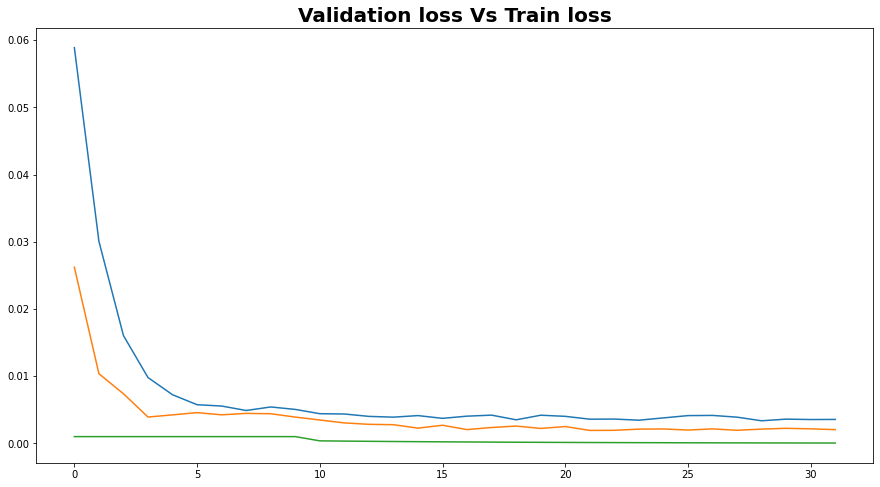

In [23]:
loss = pd.DataFrame(regressor.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Train loss", size=20, weight='bold')
plt.plot(loss)

In [24]:
predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

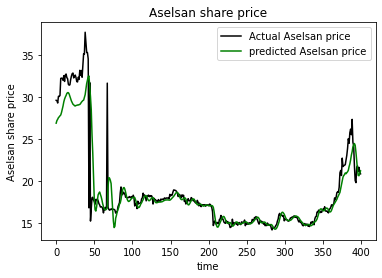

In [25]:
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()


In [26]:
# predicting next day
real_data = [model_inputs[len(model_inputs+1) - sequence_length:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [27]:
print(real_data.shape)
prediction = regressor.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

#predictions = regressor.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
#print(predictions)

(1, 50, 1)
[[21.22977]]


In [28]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(actual_prices, predicted_prices)))



Accuracy score of the predictions: 0.8517954429496115


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



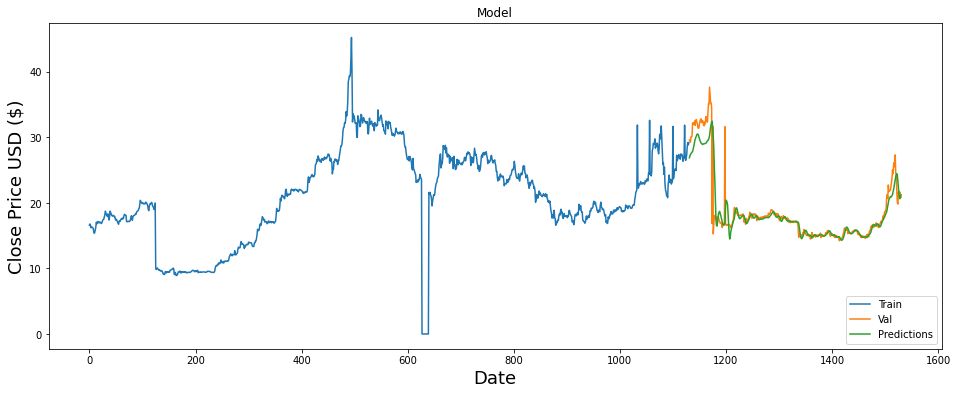

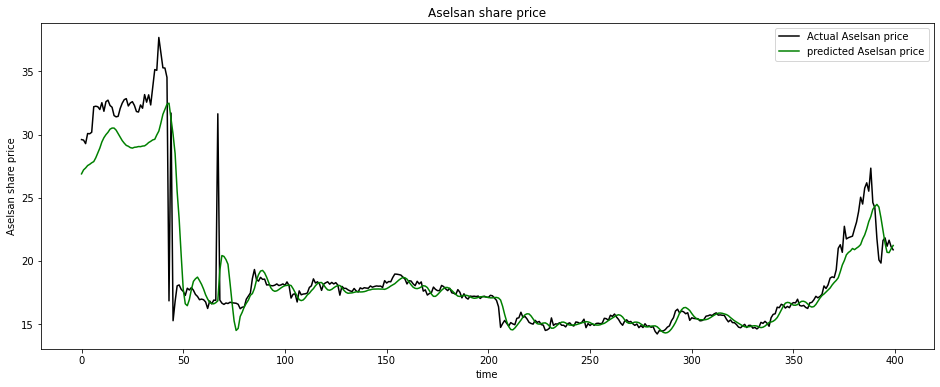

In [29]:
train = df[:1131]
valid = df[1131:]
valid['Predictions'] = predicted_prices
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train["CLOSING SESSION PRICE"])
plt.plot(valid[["CLOSING SESSION PRICE", 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

plt.figure(figsize=(16,6))
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

# RNN MODEL-2

In [30]:
# Initialising the RNN
regressor = Sequential()

regressor.add(SimpleRNN(units =50,activation=tf.keras.layers.LeakyReLU(), return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50,activation=tf.keras.layers.LeakyReLU(), return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(tf.keras.layers.BatchNormalization())

regressor.add(SimpleRNN(units = 50,activation=tf.keras.layers.LeakyReLU(), return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(tf.keras.layers.BatchNormalization())


regressor.add(SimpleRNN(units = 50,activation=tf.keras.layers.LeakyReLU(), return_sequences = False))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 128, activation = tf.keras.layers.LeakyReLU()))

regressor.add(Dense(units = 1, activation = 'sigmoid'))


regressor.compile(optimizer='rmsprop',
              loss='mean_squared_error')

start_lr = 0.0001
rampup_epochs = 10
exp_decay = 0.1

# Define the scheduling function
def schedule(epoch):
  def lr(epoch, start_lr, rampup_epochs, exp_decay):
    if epoch < rampup_epochs:
      return start_lr
    else:
      return start_lr * math.exp(-exp_decay * epoch)
  return lr(epoch, start_lr, rampup_epochs, exp_decay)

lrate = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)
callbacks_list = [lrate]


# Fitting the RNN to the Training set
regressor.fit(X_train, y_train,validation_data=(x_test,y_test), epochs = 32,callbacks=callbacks_list, batch_size = 32)




Epoch 1/32

Epoch 00001: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 11s 175ms/step - loss: 0.0553 - val_loss: 0.0233
Epoch 2/32

Epoch 00002: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 5s 154ms/step - loss: 0.0311 - val_loss: 0.0187
Epoch 3/32

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 5s 154ms/step - loss: 0.0223 - val_loss: 0.0138
Epoch 4/32

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 5s 145ms/step - loss: 0.0184 - val_loss: 0.0112
Epoch 5/32

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 6s 172ms/step - loss: 0.0143 - val_loss: 0.0100
Epoch 6/32

Epoch 00006: LearningRateScheduler setting learning rate to 0.0001.
34/34 [==============================] - 5s 152ms/step - loss: 0.0120 - va

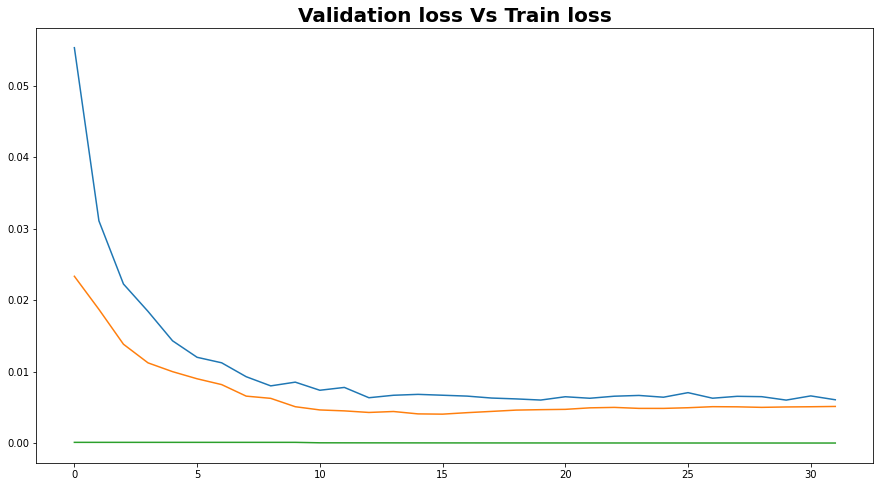

In [31]:
loss = pd.DataFrame(regressor.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Train loss", size=20, weight='bold')
plt.plot(loss)

In [32]:


predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [33]:
# predicting next day
real_data = [model_inputs[len(model_inputs+1) - sequence_length:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [34]:
print(real_data.shape)
prediction = regressor.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

#predictions = regressor.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
#print(predictions)

(1, 50, 1)
[[19.936544]]


In [35]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(actual_prices, predicted_prices)))



Accuracy score of the predictions: 0.6282275665516722


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



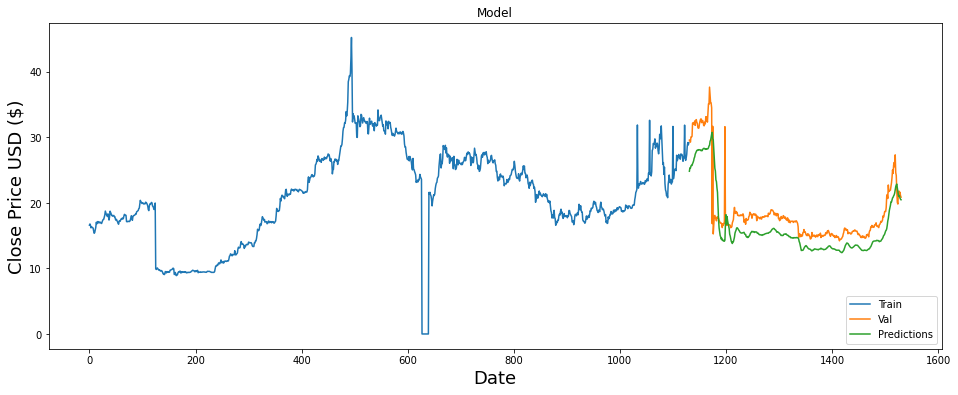

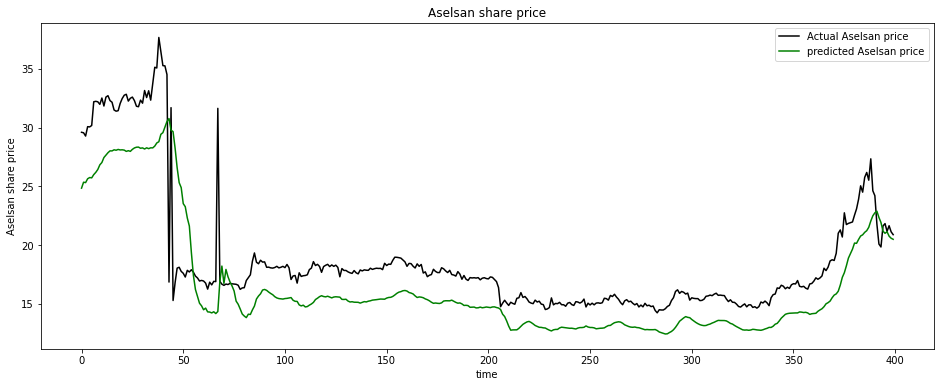

In [36]:
train = df[:1131]
valid = df[1131:]
valid['Predictions'] = predicted_prices
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train["CLOSING SESSION PRICE"])
plt.plot(valid[["CLOSING SESSION PRICE", 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

plt.figure(figsize=(16,6))
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

We are going to use an **LSTM recurrent neural network** to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before construct the LSTM model.

* **Create the dataset, ensure all data is float.
* Normalize the features.
* Split into training and test sets.
* Convert an array of values into a dataset matrix.
* Reshape into X=t and Y=t+1.
* Reshape input to be 3D (num_samples, num_timesteps, num_features).**

# LSTM MODEL

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())

model.add(LSTM(units=50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())

model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units=64, activation='tanh'))
model.add(Dropout(0.4))
# The output layer
model.add(Dense(units=1, activation='sigmoid'))



# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-7), loss='mean_squared_error')



# Train the model
model.fit(X_train, y_train,validation_data=(x_test,y_test), epochs = 25, batch_size = 32)


Epoch 1/25
34/34 [==============================] - 14s 184ms/step - loss: 0.0371 - val_loss: 0.0156
Epoch 2/25
34/34 [==============================] - 5s 139ms/step - loss: 0.0279 - val_loss: 0.0149
Epoch 3/25
34/34 [==============================] - 5s 145ms/step - loss: 0.0235 - val_loss: 0.0136
Epoch 4/25
34/34 [==============================] - 5s 150ms/step - loss: 0.0174 - val_loss: 0.0122
Epoch 5/25
34/34 [==============================] - 6s 185ms/step - loss: 0.0156 - val_loss: 0.0132
Epoch 6/25
34/34 [==============================] - 5s 142ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 7/25
34/34 [==============================] - 5s 152ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 8/25
34/34 [==============================] - 5s 142ms/step - loss: 0.0100 - val_loss: 0.0114
Epoch 9/25
34/34 [==============================] - 5s 144ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 10/25
34/34 [==============================] - 5s 145ms/step - loss: 0.0080 - val_loss: 0.009

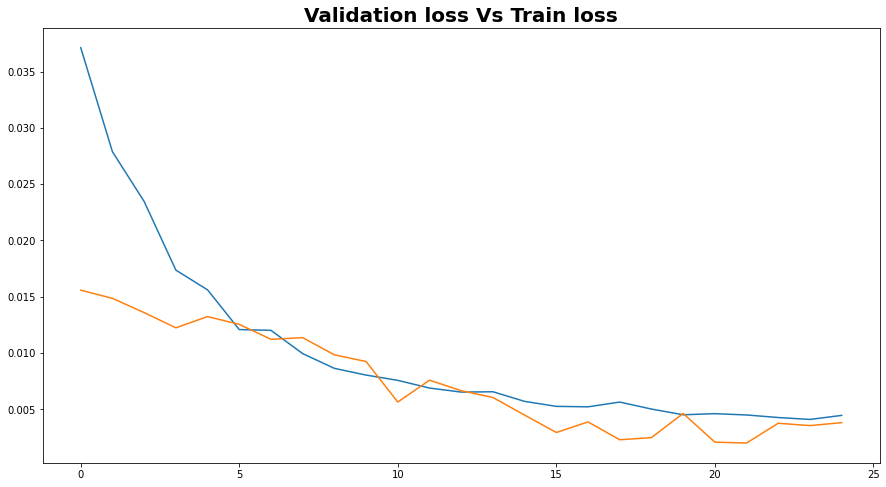

In [38]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Train loss", size=20, weight='bold')
plt.plot(loss)

In [39]:


predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [40]:
# predicting next day
real_data = [model_inputs[len(model_inputs+1) - sequence_length:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [41]:
print(real_data.shape)
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

#predictions = regressor.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
#print(predictions)

(1, 50, 1)
[[20.286655]]


In [42]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(actual_prices, predicted_prices)))



Accuracy score of the predictions: 0.7228516074816334


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



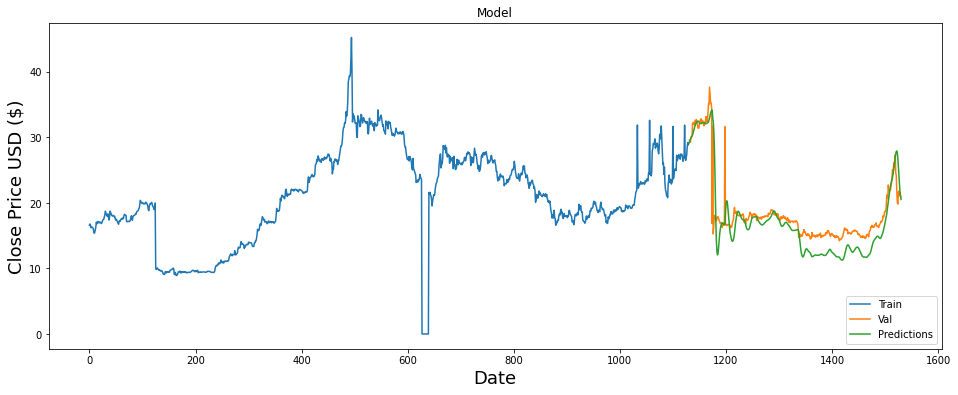

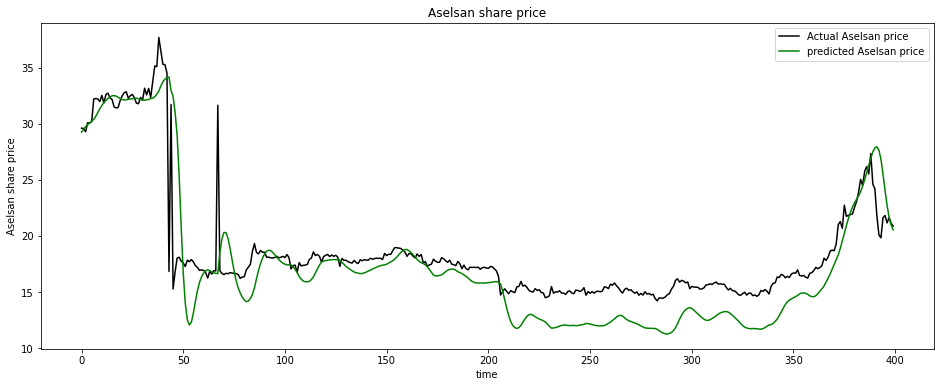

In [43]:
train = df[:1131]
valid = df[1131:]
valid['Predictions'] = predicted_prices
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train["CLOSING SESSION PRICE"])
plt.plot(valid[["CLOSING SESSION PRICE", 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

plt.figure(figsize=(16,6))
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

# GRU MODEL

In [44]:
from keras.layers import  GRU
model2 = Sequential()

model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model2.add(Dropout(0.2))

model2.add(tf.keras.layers.BatchNormalization())

model2.add(GRU(units=50, return_sequences=True, activation='tanh'))
model2.add(Dropout(0.2))

model2.add(tf.keras.layers.BatchNormalization())

model2.add(GRU(units=50, activation='tanh'))
model2.add(Dropout(0.2))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(units=64, activation='tanh'))
model2.add(Dropout(0.4))
# The output layer
model2.add(Dense(units=1, activation='tanh'))

In [45]:
from tensorflow.keras.optimizers import SGD
model2.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9), loss='mean_squared_error')

model2.fit(X_train, y_train,validation_data=(x_test,y_test), epochs=28, batch_size=64)

Epoch 1/28
17/17 [==============================] - 12s 269ms/step - loss: 0.4090 - val_loss: 0.1391
Epoch 2/28
17/17 [==============================] - 3s 193ms/step - loss: 0.1346 - val_loss: 0.1920
Epoch 3/28
17/17 [==============================] - 3s 191ms/step - loss: 0.0899 - val_loss: 0.0985
Epoch 4/28
17/17 [==============================] - 3s 204ms/step - loss: 0.0431 - val_loss: 0.0283
Epoch 5/28
17/17 [==============================] - 3s 203ms/step - loss: 0.0209 - val_loss: 0.0180
Epoch 6/28
17/17 [==============================] - 3s 200ms/step - loss: 0.0109 - val_loss: 0.0168
Epoch 7/28
17/17 [==============================] - 3s 199ms/step - loss: 0.0072 - val_loss: 0.0156
Epoch 8/28
17/17 [==============================] - 4s 230ms/step - loss: 0.0065 - val_loss: 0.0140
Epoch 9/28
17/17 [==============================] - 3s 198ms/step - loss: 0.0057 - val_loss: 0.0135
Epoch 10/28
17/17 [==============================] - 3s 190ms/step - loss: 0.0055 - val_loss: 0.013

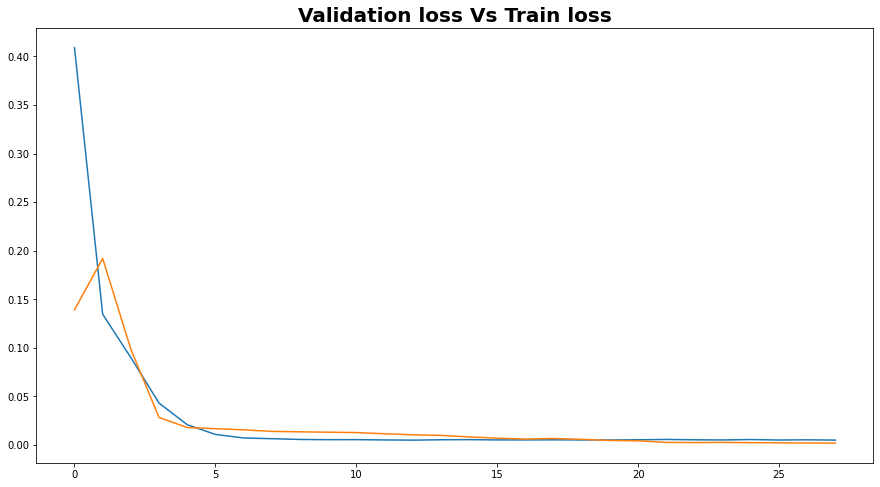

In [46]:
loss = pd.DataFrame(model2.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Train loss", size=20, weight='bold')
plt.plot(loss)

In [47]:
sequence_length = 50
actual_prices = dataset_test["CLOSING SESSION PRICE"].values

total_dataset = pd.concat((dataset_train["CLOSING SESSION PRICE"], dataset_test["CLOSING SESSION PRICE"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(dataset_test) - sequence_length:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(sequence_length, len(model_inputs)):
    x_test.append(model_inputs[x-sequence_length:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model2.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# predicting next day
real_data = [model_inputs[len(model_inputs+1) - sequence_length:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(actual_prices, predicted_prices)))



Accuracy score of the predictions: 0.8547218787897378


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



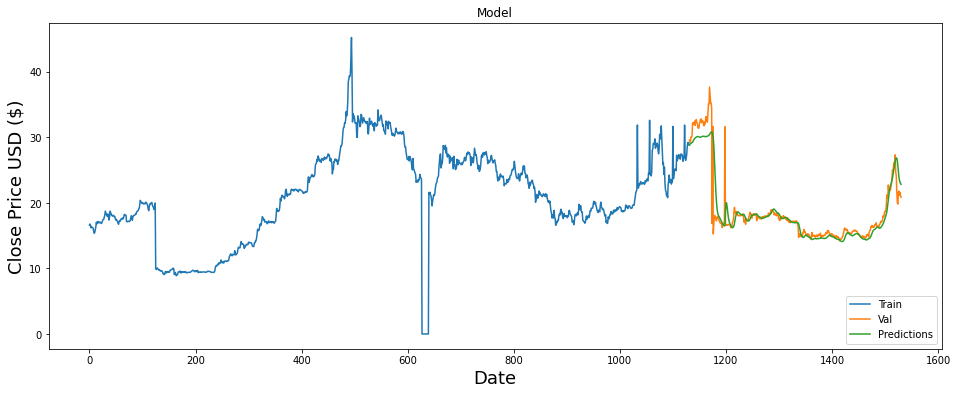

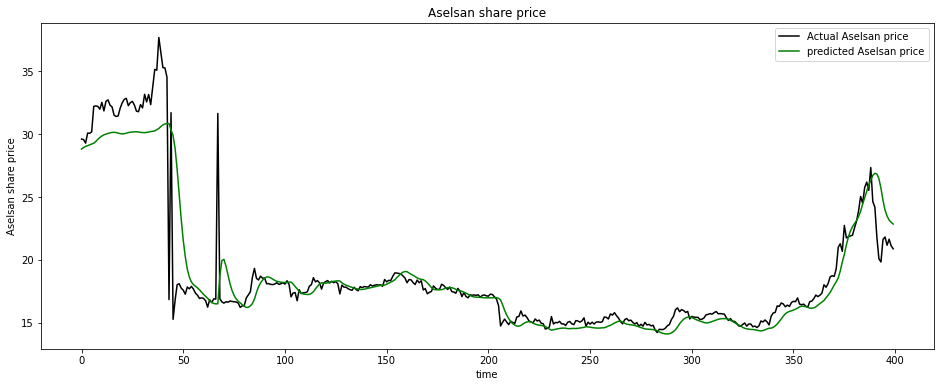

In [48]:

train = df[:1131]
valid = df[1131:]
valid['Predictions'] = predicted_prices
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train["CLOSING SESSION PRICE"])
plt.plot(valid[["CLOSING SESSION PRICE", 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

plt.figure(figsize=(16,6))
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

# LSTM MODEL WITH MULTIVARIABLE TIME-SEQUENCE

In [49]:
# List of considered Features
import math 
FEATURES = ['OPENING PRICE','HIGHEST PRICE','CLOSING SESSION PRICE'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['CLOSING SESSION PRICE']

# Print the tail of the dataframe
data_filtered_ext.tail()
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
sc = MinMaxScaler()
np_data_scaled = sc.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['CLOSING SESSION PRICE'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc('CLOSING SESSION PRICE')

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]
print(train_data.shape)
print(test_data.shape)
# The RNN needs data with the format of [samples, time steps, features]

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    print(data_len)
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) 
        y.append(data[i, 2]) 
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)





FEATURE LIST
['OPENING PRICE', 'HIGHEST PRICE', 'CLOSING SESSION PRICE']
(1531, 3)
(1225, 3)
(356, 3)
1225
356
(1175, 50, 3) (1175,)
(306, 50, 3) (306,)


In [50]:
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dropout(0.2))
model.add(LSTM(n_neurons, return_sequences=False))

model.add(Dense(16))

model.add(Dense(1,activation='tanh'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
epochs = 16
batch_size = 64

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )


150 50 3
Epoch 1/16
19/19 [==============================] - 9s 240ms/step - loss: 0.0261 - val_loss: 0.0031
Epoch 2/16
19/19 [==============================] - 4s 188ms/step - loss: 0.0055 - val_loss: 7.7188e-04
Epoch 3/16
19/19 [==============================] - 4s 225ms/step - loss: 0.0041 - val_loss: 4.3033e-04
Epoch 4/16
19/19 [==============================] - 3s 178ms/step - loss: 0.0037 - val_loss: 6.0422e-04
Epoch 5/16
19/19 [==============================] - 3s 178ms/step - loss: 0.0037 - val_loss: 3.8218e-04
Epoch 6/16
19/19 [==============================] - 3s 180ms/step - loss: 0.0034 - val_loss: 3.5399e-04
Epoch 7/16
19/19 [==============================] - 3s 181ms/step - loss: 0.0032 - val_loss: 3.3803e-04
Epoch 8/16
19/19 [==============================] - 3s 182ms/step - loss: 0.0031 - val_loss: 4.6879e-04
Epoch 9/16
19/19 [==============================] - 3s 180ms/step - loss: 0.0030 - val_loss: 5.4099e-04
Epoch 10/16
19/19 [==============================] - 3s 178

In [51]:
from sklearn.metrics import mean_absolute_error
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.43
Mean Absolute Percentage Error (MAPE): 2.41 %
Median Absolute Percentage Error (MDAPE): 1.69 %


In [52]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_scaled)))


Accuracy score of the predictions: 0.8969742794721702


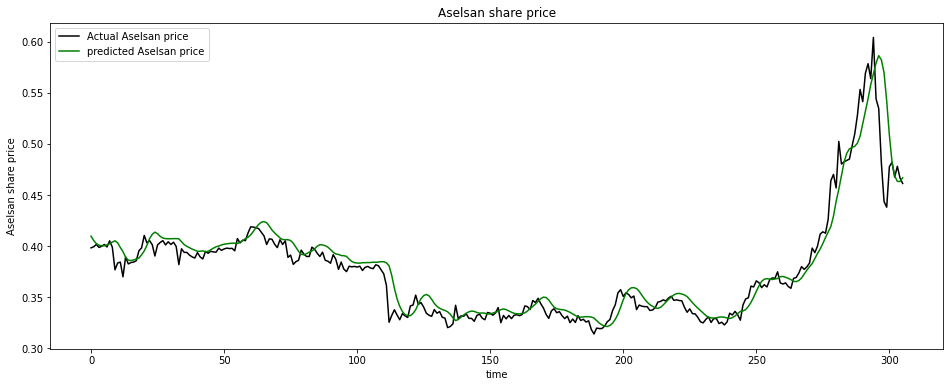

In [53]:

plt.figure(figsize=(16,6))
plt.plot(y_test, color='black', label="Actual Aselsan price")
plt.plot(y_pred_scaled, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

In [54]:
df = pd.read_csv("../input/borsa-istanbul-turkish-stock-exchange-dataset/stocks/BIOEN.csv")

# PREDICTING WITH DIFFERENT COMPANY INFORMATION

In [55]:
df

,TRADE DATE,INSTRUMENT SERIES CODE,INSTRUMENT NAME,MARKET SEGMENT,MARKET,INSTRUMENT TYPE,INSTRUMENT CLASS,MARKET MAKER,BIST 100 INDEX,BIST 30 INDEX,...,SHORT SALE VWAP,TRADED VALUE OF SHORT SALE TRADES,TRADED VOLUME OF SHORT SALE TRADES,NUMBER OF CONTRACTS OF SHORT SALE TRADES,LOWEST TRADE REPORT PRICE,HIGHEST TRADE REPORT PRICE,TRADE REPORT VWAP,TRADE REPORT TRADED VALUE,TRADE REPORT TRADED VOLUME,NUMBER OF TRADE REPORTS
0,2021-04-28,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
1,2021-04-29,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
2,2021-04-30,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
3,2021-05-03,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
4,2021-05-04,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-12-27,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,1,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
164,2021-12-28,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,1,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
165,2021-12-29,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,1,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0
166,2021-12-30,BIOEN,BIOTREND CEVRE VE ENERJI,Z,MSPOT,MSPOTEQT,MSPOTEQTBIOEN,0,1,0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0


In [56]:
data_temp = df.loc[:,:]
trace = go.Candlestick(x = df['TRADE DATE'],                       
                       open = df['OPENING PRICE'],                       
                       high = df['HIGHEST PRICE'],                       
                       low = df['LOWEST PRICE'],                       
                       close = df['CLOSING SESSION PRICE'],  
                      increasing = dict(fillcolor = 'greenyellow', 
                                         line = dict(color = 'green', 
                                                     width = 3
                                                    )),
                       decreasing = dict(fillcolor = 'lightcoral'),                       
                       whiskerwidth = 0.2)
data_figure_2 = [trace]
layout = dict(title = 'BIOEN Stock Price Data ')
fig = dict(data=data_figure_2, 
           layout=layout)
offline.iplot(fig)

In [57]:
prediction_days = 50

dataset_test = df.loc[0:400,:]
actual_prices = dataset_test["CLOSING SESSION PRICE"].values

total_dataset = pd.concat((dataset_train["CLOSING SESSION PRICE"], dataset_test["CLOSING SESSION PRICE"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(dataset_test) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [58]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = regressor.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)

In [59]:
x_test.shape

(168, 50, 1)

In [60]:
# predicting next day
real_data = [model_inputs[len(model_inputs+1) - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [61]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(actual_prices, predicted_prices)))



Accuracy score of the predictions: 0.7747509699282997


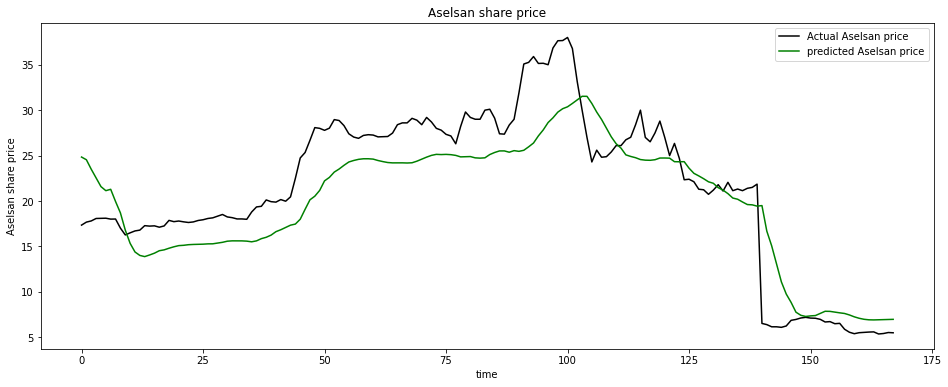

In [62]:

plt.figure(figsize=(16,6))
plt.plot(actual_prices, color='black', label="Actual Aselsan price")
plt.plot(predicted_prices, color= 'green', label="predicted Aselsan price")
plt.title("Aselsan share price")
plt.xlabel("time")
plt.ylabel("Aselsan share price")
plt.legend()
plt.show()

